In [3]:

assets = ['WMT', 'FB', 'BP']
pf_data = pd.read_csv('WMT_FB_BP_2014_2017.csv', index_col='Date')

In [4]:
pf_data.head()

,WMT,FB,BP
Date,,,
2013-12-31,70.753525,54.650002,37.758350
2014-01-02,70.951355,54.709999,37.268997
2014-01-03,70.717583,54.560001,37.183540
2014-01-06,70.321945,57.200001,37.284527
2014-01-07,70.537735,57.919998,37.711742


In [5]:
pf_data.tail()

,WMT,FB,BP
Date,,,
2017-12-06,96.769997,176.059998,39.580002
2017-12-07,96.779999,180.139999,39.310001
2017-12-08,96.550003,179.000000,39.639999
2017-12-11,96.930000,179.039993,39.930000
2017-12-12,96.699997,176.960007,40.660000


<AxesSubplot:xlabel='Date'>

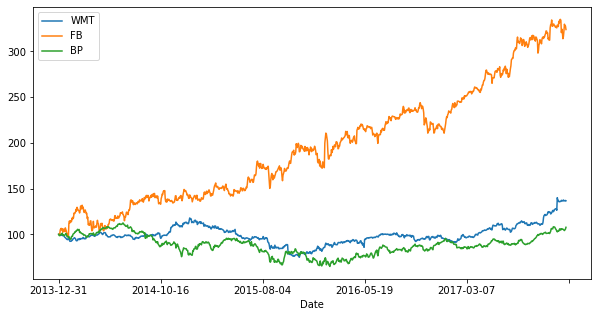

In [6]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [8]:
import numpy as np
log_returns = np.log(pf_data / pf_data.shift(1))

In [9]:
log_returns.mean() * 250

WMT    0.078495
FB     0.295220
BP     0.018603
dtype: float64

In [10]:
log_returns.cov() * 250

,WMT,FB,BP
WMT,0.032659,0.007449,0.005651
FB,0.007449,0.074427,0.013889
BP,0.005651,0.013889,0.056863


In [11]:
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.151081,0.131138
FB,0.151081,1.000000,0.213505
BP,0.131138,0.213505,1.000000


In [12]:
num_assets = len(assets)

In [13]:
num_assets

3

In [14]:
arr = np.random.random(2)
arr

array([0.58235833, 0.37161826])

In [15]:
arr[0] + arr[1]

0.9539765921711924

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights


array([0.25262738, 0.21414901, 0.53322361])

In [17]:
weights[0] + weights[1] + weights[2]


1.0

In [19]:
# Expected portfolio return
np.sum(weights * log_returns.mean()) * 250

0.09297037814094948

In [20]:
# expected portfolio variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02716562248946571

In [21]:
#expected portfolio volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.16481996993527728

In [22]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities


(array([0.20884887, 0.17844358, 0.1057458 , 0.08654765, 0.10992051,
        0.04121948, 0.19225639, 0.14491249, 0.08333083, 0.0917468 ,
        0.10939005, 0.15672142, 0.11539025, 0.19323736, 0.07339122,
        0.17777291, 0.15608624, 0.124357  , 0.16514736, 0.15396231,
        0.092804  , 0.18637892, 0.12306651, 0.1325015 , 0.14259288,
        0.11181746, 0.14372464, 0.08945969, 0.13549352, 0.14167846,
        0.12855839, 0.08123618, 0.1135001 , 0.12175151, 0.10985305,
        0.14027541, 0.18240213, 0.15931642, 0.09569468, 0.08046123,
        0.0939954 , 0.15876579, 0.12783753, 0.12294545, 0.13349055,
        0.10244475, 0.0670248 , 0.17232368, 0.10380909, 0.13792662,
        0.26148018, 0.15418268, 0.13940749, 0.17604004, 0.08717866,
        0.14768567, 0.11397717, 0.07074054, 0.17022   , 0.1025112 ,
        0.1657994 , 0.11216028, 0.0781826 , 0.1528748 , 0.14200176,
        0.12973585, 0.19314634, 0.10062322, 0.13771171, 0.0728881 ,
        0.15014946, 0.15779682, 0.07787315, 0.12

In [23]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [24]:
portfolios.head()

,Return,Volatility
0,0.208849,0.193969
1,0.178444,0.171008
2,0.105746,0.145857
3,0.086548,0.145835
4,0.109921,0.145838


In [25]:
portfolios.tail()

,Return,Volatility
995,0.216166,0.216456
996,0.216971,0.203977
997,0.164085,0.161676
998,0.108703,0.152004
999,0.181134,0.196653


Text(0, 0.5, 'Expected Return')

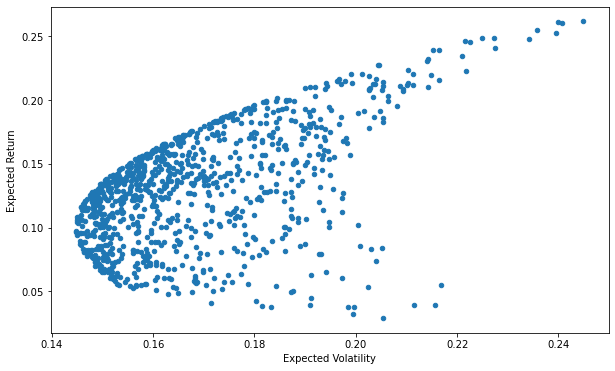

In [26]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [27]:


# CAPM / calculating beta of stock

import numpy as np
import pandas as pd

data = pd.read_csv('CAPM_data.csv', index_col = 'Date')

In [28]:
sec_returns = np.log( data / data.shift(1) )
sec_returns

,PG,^GSPC
Date,,
2012-01-03,NaN,NaN
2012-01-04,-0.000449,0.000188
2012-01-05,-0.004201,0.002939
2012-01-06,-0.002408,-0.002540
2012-01-09,0.004211,0.002259
...,...,...
2016-12-23,0.005784,0.001251
2016-12-27,-0.004246,0.002246
2016-12-28,-0.006284,-0.008392


In [29]:
cov = sec_returns.cov() * 250
cov

,PG,^GSPC
PG,0.020843,0.010025
^GSPC,0.010025,0.016361


In [30]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.010025480950656807

In [31]:
market_var = sec_returns['^GSPC'].var() * 250
market_var

0.016360592699269046

In [32]:
# Beta

PG_beta = cov_with_market / market_var
PG_beta

0.6127822588667415

In [33]:
# Calculate expected return of P&G (CAPM)
# r_pg = r_f + pg_beta * (r_m - r_f)

PG_er = 0.025 + PG_beta * 0.05
PG_er

0.05563911294333708

In [34]:
#Obtaining Sharpe Ratio
Sharpe = (PG_er - 0.025)/ (sec_returns['PG'].std()* 250**0.5)
Sharpe

0.21222619272784862